# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 입력 Feature에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습대상 Parameter가 된다.

$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)

### Boston DataSet
 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  본인 소유의 주택가격(중앙값) (단위: $1,000)


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
X, y = boston.data, boston.target

X.shape, y.shape

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

((506, 13), (506,))

In [3]:
df = pd.DataFrame(X, columns=boston.feature_names)
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## LinearRegression
- 가장 기본적인 선형 회귀 모델

### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

#####  CHAS Feature 원핫인코딩

In [8]:
chas_df = pd.get_dummies(df['CHAS'])
chas_df

,0.0,1.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
501,1,0
502,1,0
503,1,0
504,1,0


In [9]:
chas_df.columns = ['CHAS_0', 'CHAS_1']
chas_df.head()

,CHAS_0,CHAS_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [10]:
# 원본 DataFrame에 onehot encoding된 chas_df 데이터프레임을 합치기
df2 = df.join(chas_df)
df2.drop(columns='CHAS', inplace=True) #찰스강근처여부컬럼 제거
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [12]:
pd.get_dummies(df, columns=['CHAS'])

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0.0,CHAS_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1,0


##### X, y 분리, train/test set 나누기

In [13]:
#X, y분리
y = df2['MEDV']
X = df2.drop(columns='MEDV')
X.shape, y.shape

((506, 14), (506,))

In [15]:
from sklearn.model_selection import train_test_split
# 회귀모델-stratify 설정은 하지 않는다.(분류에서만 한다.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((379, 14), (127, 14))

##### Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
#scaler를 Train set으로 학습. train/validation/test set을 변환.
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

##### 평가지표 함수

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

def print_regression_metrics(y, pred, title=None):
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    if title:
        print(title)
    print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")
    print("-"*100)

##### 모델 생성, 학습, 추론, 평가

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

- coef_: 학습을 통해 찾은 Feature 별 weight들 확인
- intercept_: 학습을 통해 찾은 bias 를 확인

In [20]:
lr.intercept_

22.608707124010557

In [21]:
lr.coef_

array([-0.97100092,  1.04667838, -0.04044753, -1.80876877,  2.60991991,
       -0.19823317, -3.00216551,  2.08021582, -1.93289037, -2.15743759,
        0.75199122, -3.59027047, -0.29704388,  0.29704388])

In [22]:
# 양수: 집값을 높이는 Feature
# 음수: 집값을 떨어트리는 Feature
# 0에 가까울수록 집값에 영향을 적게 주는 Feature.
pd.Series(lr.coef_, index=X_train.columns)

CRIM      -0.971001
ZN         1.046678
INDUS     -0.040448
NOX       -1.808769
RM         2.609920
AGE       -0.198233
DIS       -3.002166
RAD        2.080216
TAX       -1.932890
PTRATIO   -2.157438
B          0.751991
LSTAT     -3.590270
CHAS_0    -0.297044
CHAS_1     0.297044
dtype: float64

##### 평가

In [23]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_regression_metrics(y_train, pred_train, title='LinearRegressor: Train')
print_regression_metrics(y_test, pred_test, title="LinearRegressor: Trest")

LinearRegressor: Train
MSE: 19.640519427908046, RMSE: 4.4317625644779355, R2: 0.7697699488741149
----------------------------------------------------------------------------------------------------
LinearRegressor: Trest
MSE: 29.782245092302407, RMSE: 5.457311159564059, R2: 0.6354638433202124
----------------------------------------------------------------------------------------------------


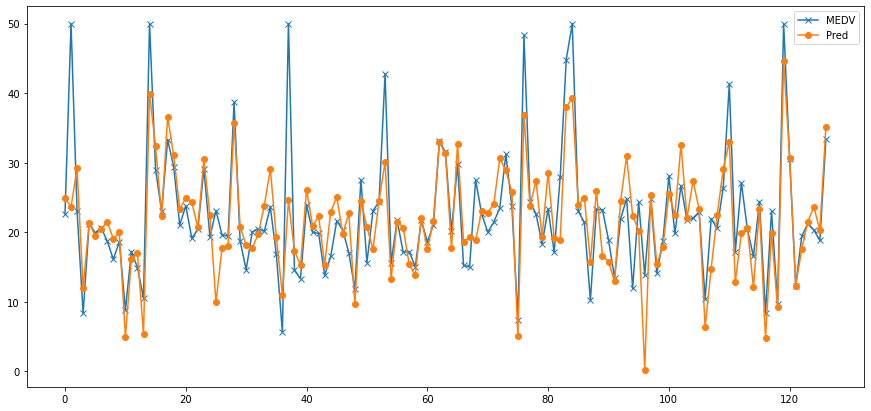

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
# 정답과 예측한 값 사이의 차이를 시각화.
# y_test 선그래프
plt.plot(range(len(y_test)), y_test, label='MEDV', marker='x')
# pred_test 선그래프
plt.plot(range(len(y_test)), pred_test, label='Pred', marker='o')
plt.legend()
plt.show()

# 다항회귀 (Polynomial Regression)
- 단순한 직선형 보다 복잡한 비선형의 데이터셋을 학습하기 위한 방식.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한 뒤 선형모델로 훈련시킨다.
    - 파라미터 가중치를 기준으로는 일차식이 되어 선형모델이다. 파라미터(Coef, weight)들을 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

m = 100 #데이터 개수
X = 6 * np.random.rand(m, 1) - 3  #np.random.rand(0축개수, 1축개수) : 0 ~ 1 랜덤실수
y = X**2 + X + 2 + np.random.normal(0,1, size=(m,1))#np.random.normal(평균, 표준편차) 정규분포 랜덤실수
y = y.flatten() #N차원배열을 1차원 배열로 변환.
print(X.shape, y.shape)

(100, 1) (100,)


In [27]:
df = pd.DataFrame({"X":X.flatten(), "Y":y})
df.head()

,X,Y
0,0.292881,1.213510
1,1.291136,5.858995
2,0.616580,3.462414
3,0.269299,0.805577
4,-0.458071,3.240010


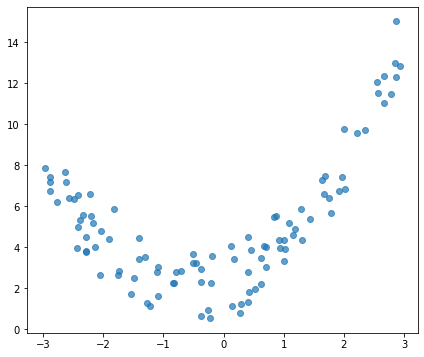

In [28]:
plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.7)
plt.show()

##### 모델생성, 학습

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_, lr.intercept_)

# 0.78*X + 5.17 = y_hat
# X**2 + X + 2  = y정답

[0.78189543] 5.175619278567209


In [30]:
pred = lr.predict(X)
print_regression_metrics(y, pred)

MSE: 7.729204760808937, RMSE: 2.7801447373848966, R2: 0.19138252437306003
----------------------------------------------------------------------------------------------------


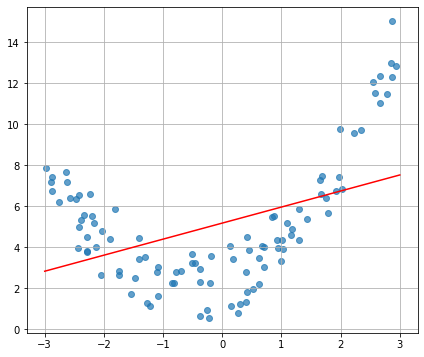

In [32]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
pred_new = lr.predict(X_new)

plt.figure(figsize=(7,6))

plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, pred_new, color='red')

plt.grid(True)
plt.show()

##### PolynomialFeatures를 이용해 다항회귀구현

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly_f = PolynomialFeatures(degree=2, #최고차항의 차수 지정
                            include_bias=False) #기본값:True - 상수항(1) 추가여부
X_poly = poly_f.fit_transform(X)

In [61]:
X.shape, X_poly.shape

((100, 1), (100, 2))

In [62]:
X[:5]

array([[ 0.29288102],
       [ 1.2911362 ],
       [ 0.61658026],
       [ 0.2692991 ],
       [-0.4580712 ]])

In [63]:
X_poly[:5]

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923]])

In [64]:
poly_f.get_feature_names_out() #각 Feature가 이름(어떤 연산을 해서 만들었는지)을 출력 

array(['x0', 'x0^2'], dtype=object)

##### LinearRegression 모델을 이용해 평가

In [65]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

In [66]:
print(lr2.coef_, lr2.intercept_)

[0.97906552 0.94978823] 2.340500756262887


In [67]:
pred2 = lr2.predict(X_poly)
print_regression_metrics(y, pred2, title="다항회귀")
print_regression_metrics(y, pred, title="변환없이")

다항회귀
MSE: 0.9735576723414217, RMSE: 0.9866902616026073, R2: 0.8981478985551461
----------------------------------------------------------------------------------------------------
변환없이
MSE: 7.729204760808937, RMSE: 2.7801447373848966, R2: 0.19138252437306003
----------------------------------------------------------------------------------------------------


##### 시각화

In [68]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
X_new_poly = poly_f.transform(X_new)
pred_new2 = lr2.predict(X_new_poly)

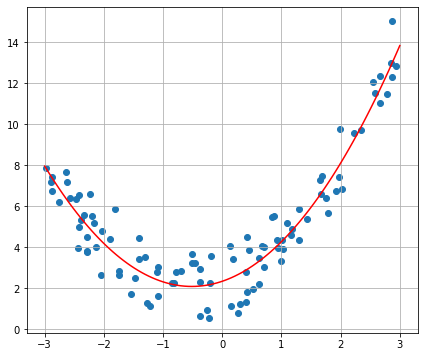

In [71]:
plt.figure(figsize=(7,6))

plt.scatter(X, y)
plt.plot(X_new, pred_new2, color='red')
plt.grid(True)
plt.show()

## degree를 크게
- Overfitting 문제가 생긴다.

In [84]:
pnf = PolynomialFeatures(degree=25, include_bias=False)
# pnf = PolynomialFeatures(degree=100, include_bias=False)
X_train_poly_100 = pnf.fit_transform(X)
X_train_poly_100.shape, X.shape

((100, 25), (100, 1))

In [85]:
lr = LinearRegression()
lr.fit(X_train_poly_100, y)

LinearRegression()

In [86]:
lr.coef_.shape
lr.coef_

array([ 2.47166213e+00, -1.46373938e+00, -3.02644913e+01,  2.80830627e+01,
        1.15740859e+02, -6.91402528e+01, -1.94446577e+02,  7.77717600e+01,
        1.80938554e+02, -4.92413369e+01, -1.03730280e+02,  1.92725472e+01,
        3.87825145e+01, -4.87971911e+00, -9.73453389e+00,  8.12148611e-01,
        1.65344995e+00, -8.79981899e-02, -1.87513176e-01,  5.95238227e-03,
        1.35991132e-02, -2.27083342e-04, -5.70325569e-04,  3.70450469e-06,
        1.05198948e-05])

In [87]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
X_new_poly_100 = pnf.transform(X_new)
pred_new_100 = lr.predict(X_new_poly_100)

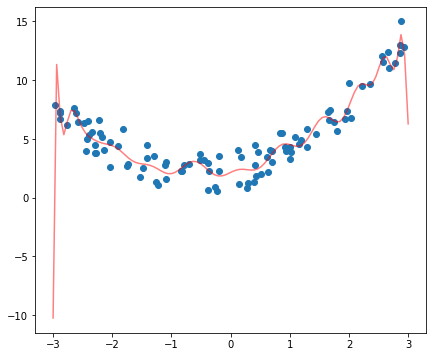

In [88]:
plt.figure(figsize=(7,6))
plt.scatter(X, y)
plt.plot(X_new, pred_new_100, color='r', alpha=0.5)
plt.show()

### PolynomialFeatures 예제

In [89]:
data = np.arange(12).reshape(4,3) #Feature: 3
print(data.shape)
data #feature: 3

(4, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [90]:
pnf2 = PolynomialFeatures(degree=2) #include_bias=False)
data_poly = pnf2.fit_transform(data)
data_poly.shape

(4, 10)

In [91]:
pnf2.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [92]:
pd.DataFrame(data_poly, columns=pnf2.get_feature_names_out())

,1,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,4.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,6.0,7.0,8.0,36.0,42.0,48.0,49.0,56.0,64.0
3,1.0,9.0,10.0,11.0,81.0,90.0,99.0,100.0,110.0,121.0


In [93]:
pnf3 = PolynomialFeatures(degree=5)
data_poly2 = pnf3.fit_transform(data)
data_poly2.shape

(4, 56)

In [94]:
pnf3.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [95]:
# interaction_only=True
# 교차곱 Feature만 만들고 제곱한 Feature는 만들지 않는다.
# 차수는 늘리지 않으면서 데이터의 다양성을 위해 Feature를 
#                                              늘리고자 할때 사용
pnf4 = PolynomialFeatures(interaction_only=True)
data_poly4 = pnf4.fit_transform(data)
data_poly4.shape

(4, 7)

In [96]:
pnf4.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0 x1', 'x0 x2', 'x1 x2'], dtype=object)

### 다항회귀를 Boston Dataset에 적용

In [97]:
pnf = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = pnf.fit_transform(X_train_scaled)
X_test_scaled_poly = pnf.transform(X_test_scaled)

In [98]:
X_train_scaled.shape, X_train_scaled_poly.shape

((379, 14), (379, 119))

In [99]:
pnf.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4',
       'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11',
       'x0 x12', 'x0 x13', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5',
       'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12',
       'x1 x13', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7',
       'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x3^2',
       'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10',
       'x3 x11', 'x3 x12', 'x3 x13', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7',
       'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x5^2',
       'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12',
       'x5 x13', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11',
       'x6 x12', 'x6 x13', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11',
       'x7 x12', 'x7 x13', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11

##### 모델 생성 학습 추론 평가

In [100]:
lr3 = LinearRegression()
lr3.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [101]:
pred_train3 = lr3.predict(X_train_scaled_poly)
pred_test3 = lr3.predict(X_test_scaled_poly)

In [102]:
print('PolynomialFeature 적용전 결과')
print_regression_metrics(y_train, pred_train, title='Train')
print_regression_metrics(y_test, pred_test, title='Test')

PolynomialFeature 적용전 결과
Train
MSE: 19.640519427908046, RMSE: 4.4317625644779355, R2: 0.7697699488741149
----------------------------------------------------------------------------------------------------
Test
MSE: 29.782245092302407, RMSE: 5.457311159564059, R2: 0.6354638433202124
----------------------------------------------------------------------------------------------------


In [103]:
print('PolynomialFeature 적용 후 결과-degree-2')
print_regression_metrics(y_train, pred_train3, title='Train poly')
print_regression_metrics(y_test, pred_test3, title='Test poly')

PolynomialFeature 적용 후 결과-degree-2
Train poly
MSE: 4.09231630944325, RMSE: 2.0229474312110165, R2: 0.952029059282025
----------------------------------------------------------------------------------------------------
Test poly
MSE: 31.957178742416264, RMSE: 5.653068082237845, R2: 0.6088425475989248
----------------------------------------------------------------------------------------------------


#### Degree=5
- 과적합

In [104]:
pnf2 = PolynomialFeatures(degree=5, include_bias=False)
X_train_scaled_poly2 = pnf2.fit_transform(X_train_scaled)
X_test_scaled_poly2 = pnf2.transform(X_test_scaled)
X_train_scaled.shape, X_train_scaled_poly2.shape

((379, 14), (379, 11627))

In [105]:
lr = LinearRegression()
lr.fit(X_train_scaled_poly2, y_train)

LinearRegression()

In [106]:
pred_train4 = lr.predict(X_train_scaled_poly2)
pred_test4 = lr.predict(X_test_scaled_poly2)

In [107]:
print('PolynomialFeature 적용 후 결과-degree-5')
print_regression_metrics(y_train, pred_train4, title="Train")
print_regression_metrics(y_test, pred_test4, title='Test')

PolynomialFeature 적용 후 결과-degree-5
Train
MSE: 1.817459170554153e-24, RMSE: 1.3481317333829632e-12, R2: 1.0
----------------------------------------------------------------------------------------------------
Test
MSE: 75403.5735514316, RMSE: 274.5971113311857, R2: -921.9434791490922
----------------------------------------------------------------------------------------------------


In [111]:
y_train.mean()

22.608707124010564

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
    - weight를 0에 가까운 값으로 학습되도록 한다.
- 입력데이터의 Feature들이 너무 많은 경우 과적합이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 과적합이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

### 예제

In [112]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

data = load_boston()
X, y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [125]:
from sklearn.linear_model import Ridge

ridge1 = Ridge(random_state=0) #alpha=1.0
ridge1.fit(X_train_scaled, y_train)

pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

In [126]:
print('alpha=1')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

alpha=1
Train
MSE: 19.64194935381896, RMSE: 4.431923888540839, R2: 0.76975318699993
----------------------------------------------------------------------------------------------------
Test
MSE: 29.853763334547608, RMSE: 5.463859746968951, R2: 0.6345884564889054
----------------------------------------------------------------------------------------------------


In [127]:
ridge1.coef_

array([-0.96187481,  1.02775462, -0.06861144,  0.59814087, -1.77318401,
        2.6205672 , -0.20466821, -2.96504904,  2.00091047, -1.85840697,
       -2.14955893,  0.75175979, -3.57350065])

In [117]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha=0.01, random_state=0) #alpah=0.01 (1.0보다 약한 규제)
ridge1.fit(X_train_scaled, y_train)
pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

print('alpha=0.01')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

19.641949
29.85376

alpha=0.01
Train
MSE: 19.6405195795332, RMSE: 4.431762581584578, R2: 0.7697699470967347
----------------------------------------------------------------------------------------------------
Test
MSE: 29.782964300126416, RMSE: 5.457377053138845, R2: 0.6354550401807847
----------------------------------------------------------------------------------------------------


In [ ]:
ridge1.coef_

In [118]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha=1000, random_state=0) #alpah=1000 (1.0 비해 강한 규제)
ridge1.fit(X_train_scaled, y_train)
pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

print('alpha=1000')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

alpha=1000
Train
MSE: 37.6379127019148, RMSE: 6.13497454778052, R2: 0.55880094732523
----------------------------------------------------------------------------------------------------
Test
MSE: 47.385118128796044, RMSE: 6.883684923701552, R2: 0.42000380451661745
----------------------------------------------------------------------------------------------------


In [ ]:
ridge1.coef_

In [119]:
# (약한규제-복잡모델-overfitting)0 ----alpha -----1000 (강한규제-단순한모델-underfitting)

## GridSearchCV를 이용해 최적의 alpha 탐색

In [120]:
from sklearn.model_selection import GridSearchCV
param = {"alpha":[0.01, 0.1, 1, 5, 10, 20, 30, 40, 100]}
ridge = Ridge(random_state=0)
gs = GridSearchCV(ridge, param, cv=4, scoring=['r2', 'neg_mean_squared_error'], refit='r2')

gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=4, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 20, 30, 40, 100]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [121]:
result_df = pd.DataFrame(gs.cv_results_)
result_df.sort_values('rank_test_r2').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
5,0.001746,0.000827,0.000997,2.920019e-07,20,{'alpha': 20},0.769783,0.645949,0.646802,0.818040,0.720144,0.075716,1,-17.823357,-26.999550,-30.525873,-18.104060,-23.363210,5.542457,2
4,0.000997,0.000004,0.001248,4.311969e-04,10,{'alpha': 10},0.762913,0.645798,0.650567,0.820667,0.719986,0.074670,2,-18.355176,-27.011065,-30.200460,-17.842694,-23.352349,5.376125,1
6,0.001246,0.000434,0.001247,1.634814e-03,30,{'alpha': 30},0.773569,0.646587,0.644039,0.814082,0.719569,0.075631,3,-17.530173,-26.950941,-30.764711,-18.497835,-23.435915,5.597524,4
3,0.001751,0.000429,0.001243,4.323683e-04,5,{'alpha': 5},0.757436,0.646131,0.653369,0.820574,0.719378,0.073163,4,-18.779233,-26.985694,-29.958289,-17.851926,-23.393786,5.196172,3
7,0.001995,0.000705,0.000997,7.049485e-04,40,{'alpha': 40},0.775585,0.647291,0.641584,0.809645,0.718526,0.075088,5,-17.374137,-26.897195,-30.976839,-18.939336,-23.546877,5.607163,8


In [124]:
gs.best_params_, gs.best_score_

({'alpha': 20}, 0.7201435211837182)

## 규제 alpha 에 따른 weight 변화

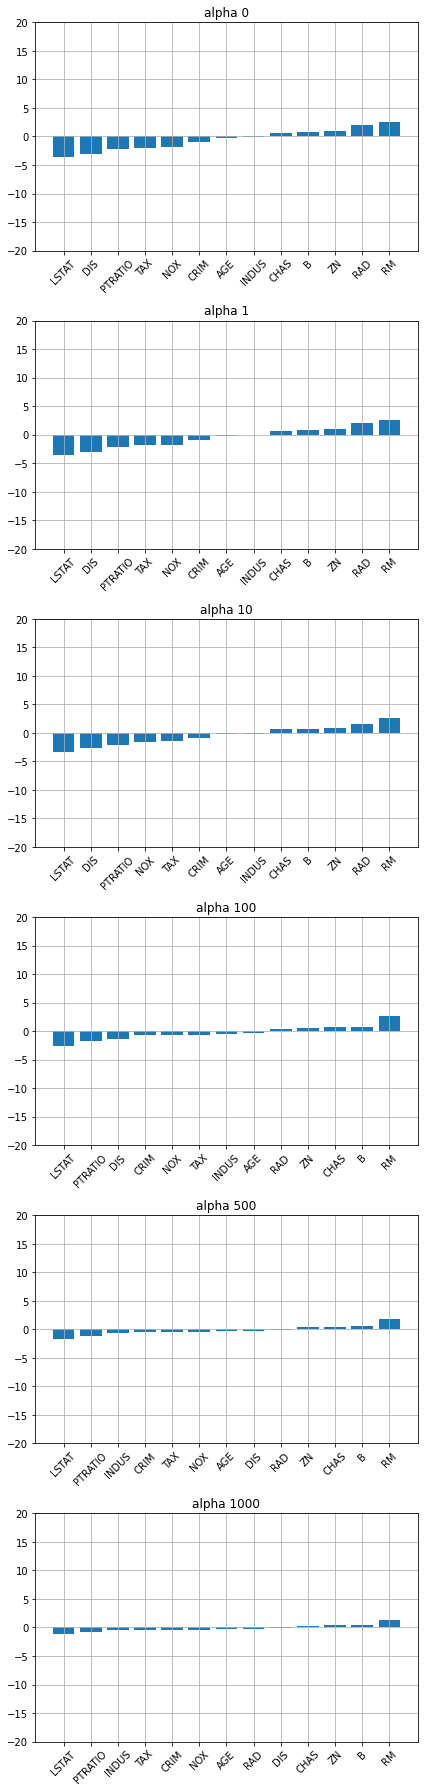

In [128]:
import matplotlib.pyplot as plt
np.random.seed(1)
alpha_list = [0,  1, 10, 100, 500, 1000]
coef_df = pd.DataFrame() #각 alpha별 weight들 저장할 DataFrame

plt.figure(figsize=(6,25))
for idx, alpha in enumerate(alpha_list, start=1):

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    pred_train = ridge.predict(X_train_scaled)
    pred_test = ridge.predict(X_test_scaled)
    
#     ridge.coef_: 각 Featuer에 곱해진 weight들을 조회
    w = pd.Series(np.round(ridge.coef_,3), index=data["feature_names"]).sort_values()
    coef_df[f'alpha {alpha}'] = w #coef_ 시리즈를 DataFrame 열로 추가.
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20)
    plt.title(f"alpha {alpha}")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [129]:
coef_df

,alpha 0,alpha 1,alpha 10,alpha 100,alpha 500,alpha 1000
LSTAT,-3.590,-3.574,-3.438,-2.684,-1.622,-1.163
DIS,-3.002,-2.965,-2.672,-1.379,-0.332,-0.063
PTRATIO,-2.157,-2.150,-2.090,-1.783,-1.201,-0.880
TAX,-1.933,-1.858,-1.398,-0.630,-0.527,-0.477
NOX,-1.809,-1.773,-1.513,-0.686,-0.406,-0.371
CRIM,-0.971,-0.962,-0.899,-0.703,-0.535,-0.443
AGE,-0.198,-0.205,-0.245,-0.308,-0.333,-0.327
INDUS,-0.040,-0.069,-0.242,-0.539,-0.571,-0.513
CHAS,0.594,0.598,0.623,0.643,0.470,0.334
B,0.752,0.752,0.751,0.714,0.535,0.423


## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

### 예제

In [130]:
from sklearn.linear_model import Lasso

In [131]:
lasso = Lasso() #alpha=1 default
lasso.fit(X_train_scaled, y_train)
pred_train = lasso.predict(X_train_scaled)
pred_test = lasso.predict(X_test_scaled)

print('alpha=1')
print_regression_metrics(y_train, pred_train, "alpha=1 Train")
print_regression_metrics(y_test, pred_test, "alpha=1 Test")

alpha=1
alpha=1 Train
MSE: 25.38793844433231, RMSE: 5.038644504659196, R2: 0.702397567056503
----------------------------------------------------------------------------------------------------
alpha=1 Test
MSE: 35.48963616828034, RMSE: 5.957317866983458, R2: 0.5656050935497574
----------------------------------------------------------------------------------------------------


In [132]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.52933025, -0.        , -0.        , -0.        , -0.22763148,
       -1.70088382,  0.13186059, -3.60565498])

In [133]:
lasso = Lasso(alpha=10, random_state=0) #alpha=10
lasso.fit(X_train_scaled, y_train)
pred_train = lasso.predict(X_train_scaled)
pred_test = lasso.predict(X_test_scaled)

print('alpha=10')
print_regression_metrics(y_train, pred_train, "alpha=10 Train")
print_regression_metrics(y_test, pred_test, "alpha=10 Test")

alpha=10
alpha=10 Train
MSE: 85.30823553163789, RMSE: 9.236245748768159, R2: 0.0
----------------------------------------------------------------------------------------------------
alpha=10 Test
MSE: 81.7904659829155, RMSE: 9.043808157126925, R2: -0.001119359203955339
----------------------------------------------------------------------------------------------------


In [134]:
lasso.intercept_

22.608707124010557

In [135]:
lasso.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

C:\Users\Playdata\AppData\Local\Temp/ipykernel_10180/1124120420.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train_scaled, y_train)
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.722e+03, tolerance: 3.233e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fas

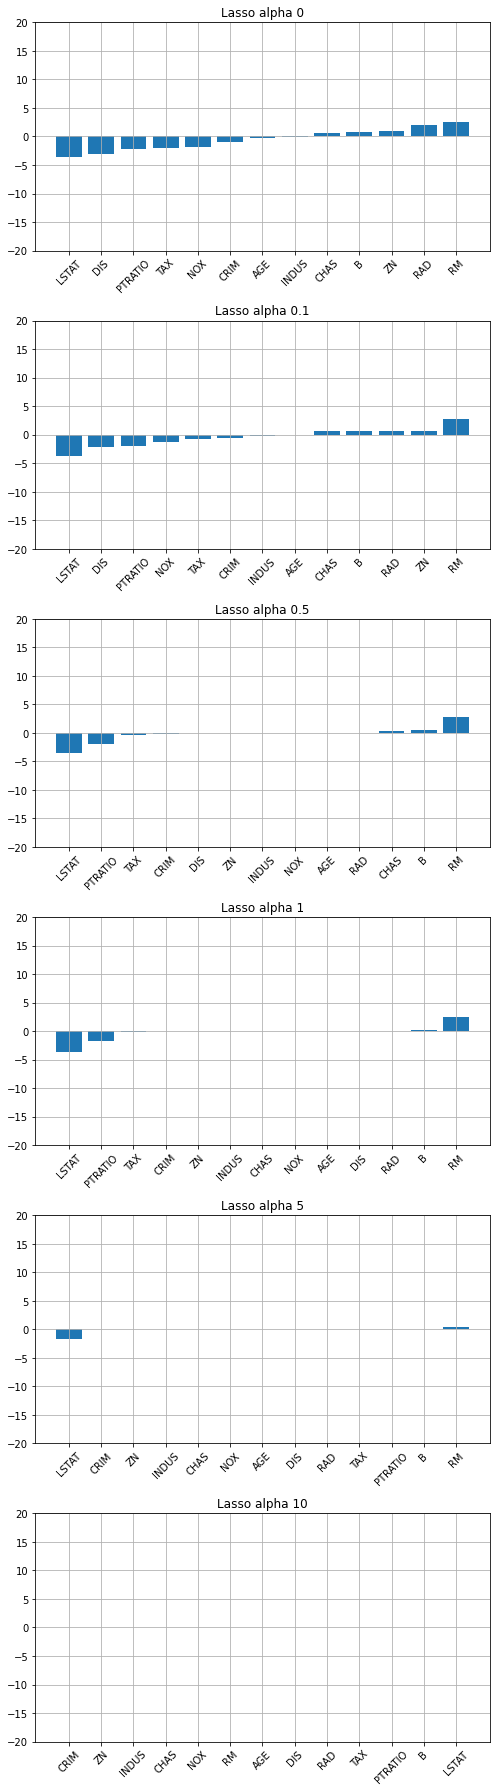

In [137]:
import matplotlib.pyplot as plt
alpha_list = [0, 0.1, 0.5, 1, 5, 10]

lasso_coef_df = pd.DataFrame()

plt.figure(figsize=(7,25))
for idx, alpha in enumerate(alpha_list, start=1):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    
    w = pd.Series(lasso.coef_, index=data["feature_names"]).sort_values()
    lasso_coef_df[f'alpha {alpha}'] = w
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20)
    plt.grid(True)
    plt.title(f"Lasso alpha {alpha}")
    
plt.tight_layout()
plt.show()    

In [138]:
lasso_coef_df

,alpha 0,alpha 0.1,alpha 0.5,alpha 1,alpha 5,alpha 10
LSTAT,-3.590270,-3.658501,-3.532405,-3.605655,-1.752124,-0.0
DIS,-3.002166,-2.216914,-0.003686,-0.000000,0.000000,0.0
PTRATIO,-2.157438,-2.055994,-1.934512,-1.700884,-0.000000,-0.0
TAX,-1.932890,-0.724794,-0.291927,-0.227631,-0.000000,-0.0
NOX,-1.808769,-1.345790,-0.000000,-0.000000,-0.000000,-0.0
CRIM,-0.971001,-0.659315,-0.236287,-0.000000,-0.000000,-0.0
AGE,-0.198233,-0.007398,-0.000000,-0.000000,-0.000000,-0.0
INDUS,-0.040448,-0.207389,-0.000000,-0.000000,-0.000000,-0.0
CHAS,0.594088,0.575874,0.303608,0.000000,0.000000,0.0
B,0.751991,0.629083,0.456915,0.131861,0.000000,0.0


###  PolynomialFeatures로 전처리한 Boston Dataset에 Ridge, Lasso  규제 적용
- degree 2로 전처리한 데이터셋 이용

In [140]:
X_train_scaled_poly.shape

(379, 119)

In [157]:
alpha_list = [0.01, 0.1, 1, 10, 100, 200, 500, 1000]

In [158]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

##### LinearRegression으로 평가

In [159]:
lr = LinearRegression()
lr.fit(X_train_scaled_poly, y_train)

pred_train_lr = lr.predict(X_train_scaled_poly)
pred_test_lr = lr.predict(X_test_scaled_poly)

print_regression_metrics(y_train, pred_train_lr, title="LinearRegression Train")
print_regression_metrics(y_test, pred_test_lr, title="LinearRegression Test")

LinearRegression Train
MSE: 4.09231630944325, RMSE: 2.0229474312110165, R2: 0.952029059282025
----------------------------------------------------------------------------------------------------
LinearRegression Test
MSE: 31.957178742416264, RMSE: 5.653068082237845, R2: 0.6088425475989248
----------------------------------------------------------------------------------------------------


##### Ridge 의 alpha값 변화에 따른 R square 확인

In [160]:
ridge_train_metrics_list = []
ridge_test_metrics_list = []

for alpha in alpha_list:
#     모델생성
    ridge = Ridge(alpha=alpha, random_state=0)
#     학습
    ridge.fit(X_train_scaled_poly, y_train)
#     추론
    pred_train = ridge.predict(X_train_scaled_poly)
    pred_test = ridge.predict(X_test_scaled_poly)
#     평가=>결과(r2_score)를 list에 추가.
    ridge_train_metrics_list.append(r2_score(y_train, pred_train))
    ridge_test_metrics_list.append(r2_score(y_test, pred_test))

In [161]:
ridge_result = pd.DataFrame({
    "alpha":alpha_list,
    "train":ridge_train_metrics_list,
    "test":ridge_test_metrics_list
})

In [162]:
ridge_result

,alpha,train,test
0,0.01,0.951620,0.616821
1,0.10,0.951047,0.625563
2,1.00,0.948250,0.647907
3,10.00,0.938756,0.742694
4,100.00,0.902752,0.760789
5,200.00,0.873392,0.732392
6,500.00,0.810367,0.668169
7,1000.00,0.740547,0.601979


##### lasso 의 alpha값 변화에 따른 R square 확인

In [163]:
lasso_train_metrics_list = []
lasso_test_metrics_list = []

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, random_state=0)
    
    lasso.fit(X_train_scaled_poly, y_train)
    
    pred_train = lasso.predict(X_train_scaled_poly)
    pred_test = lasso.predict(X_test_scaled_poly)
    
    lasso_train_metrics_list.append(r2_score(y_train, pred_train))
    lasso_test_metrics_list.append(r2_score(y_test, pred_test))

In [164]:
lasso_result = pd.DataFrame({
    "alpha":alpha_list,
    "train":lasso_train_metrics_list,
    "test":lasso_test_metrics_list
})

In [165]:
lasso_result

,alpha,train,test
0,0.01,0.944941,0.686941
1,0.10,0.910694,0.776982
2,1.00,0.802262,0.695405
3,10.00,0.008723,0.009718
4,100.00,0.000000,-0.001119
5,200.00,0.000000,-0.001119
6,500.00,0.000000,-0.001119
7,1000.00,0.000000,-0.001119


## ElasticNet(엘라스틱넷)
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 라쏘 규제항을 더해서 추가한다. 
- 혼합비율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [166]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.6) #alpha 페날티, l1_ratio: 비율(라쏘쪽. 위의것으로 보면 앞의것의 r 지정.)
elastic.fit(X_train_scaled, y_train)

pred_train = elastic.predict(X_train_scaled)
pred_test = elastic.predict(X_test_scaled)

print_regression_metrics(y_train, pred_train, title='ElasticNet alpha 0.1: Train')
print_regression_metrics(y_test, pred_test, title="ElasticNet alpha 0.1: Trest")

ElasticNet alpha 0.1: Train
MSE: 20.128961453751398, RMSE: 4.486531115879104, R2: 0.7640443348955887
----------------------------------------------------------------------------------------------------
ElasticNet alpha 0.1: Trest
MSE: 31.441232021951834, RMSE: 5.607248168393462, R2: 0.6151577610405823
----------------------------------------------------------------------------------------------------


# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 **ElasticNet**을 사용한다.